# Part I:A/BTesting Sales Promotion Strategies (4 points)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
campaign=pd.read_csv('/Users/luoyayuan/Desktop/Class Slides/654/assignment4/campaign_data.csv')
campaign.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [3]:
campaign.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

In [4]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


Question A: Generate a barplot to show the average SalesInThousands values, separated by the different promotion types.

In [5]:
number=campaign['Promotion'].value_counts()
number

3    188
2    188
1    172
Name: Promotion, dtype: int64

In [6]:
total=campaign.groupby(by='Promotion')['SalesInThousands'].sum()
total

Promotion
1     9993.03
2     8897.93
3    10408.52
Name: SalesInThousands, dtype: float64

In [7]:
average=total/number
average

1    58.099012
2    47.329415
3    55.364468
dtype: float64

In [8]:
data=[[1,58.099012],[2,47.329415],[3,55.364468]]
df = pd.DataFrame(data, columns = ['Promotion', 'Average Sales amount'])
df

,Promotion,Average Sales amount
0,1,58.099012
1,2,47.329415
2,3,55.364468


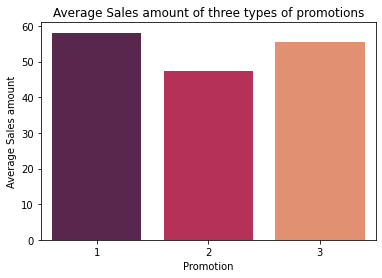

In [9]:
sns.barplot(x='Promotion',y='Average Sales amount',palette='rocket',ci=None,data=df);
plt.title('Average Sales amount of three types of promotions');

This barplot shows 3 types of promotions' average sales amount.Promotion 1 with the highest average sales amount while promotion 2 with the lowest average sales amount. Thus promotion 1 wins from this metric.

Question B: You want to make sure that the promotions were evenly-balanced across time. Create another barplot -- this time, build a barplot that shows the number of instances in which each of the promotions was held, along one of your axes. Convert the ‘week’ variable to a factor first, and include it in your plot as well.


In [10]:
campaign['week']=campaign['week'].astype(object)

In [11]:
campaign.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    object 
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 30.1+ KB


In [12]:
campaign.df=campaign.groupby(by='week')['Promotion'].value_counts()
campaign.df

/var/folders/69/sjzrfpp90kb586qq0vrpgyjw0000gn/T/ipykernel_1090/1112777980.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  campaign.df=campaign.groupby(by='week')['Promotion'].value_counts()


week  Promotion
1     2            47
      3            47
      1            43
2     2            47
      3            47
      1            43
3     2            47
      3            47
      1            43
4     2            47
      3            47
      1            43
Name: Promotion, dtype: int64

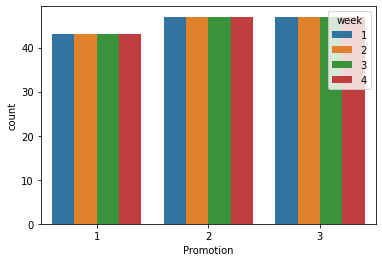

In [13]:
sns.countplot(x='Promotion',hue='week',data=campaign);

This barplot shows detailed promotion types' average sales number in each week. I do not think ‘week’ variable is a confounding variable in the experiment since the total number of promotions are the same in each week and the factor of week is not associated both with the average sales amount (dependent variable) and with the factor promotions being studied (independent variable).

Question C:Next, generate some summary stats here -- group the observations by ‘Promotion’ and then describe the store ages

In [14]:
campaign.groupby(by='Promotion')['AgeOfStore'].value_counts()

Promotion  AgeOfStore
1          1             24
           6             20
           3             16
           4             16
           8             12
           12            12
           13            12
           2              8
           5              8
           9              8
           18             8
           7              4
           11             4
           15             4
           19             4
           22             4
           24             4
           27             4
2          1             36
           7             24
           10            16
           3             12
           4             12
           5             12
           9             12
           2              8
           8              8
           13             8
           14             8
           19             8
           6              4
           12             4
           15             4
           23             4
           25             

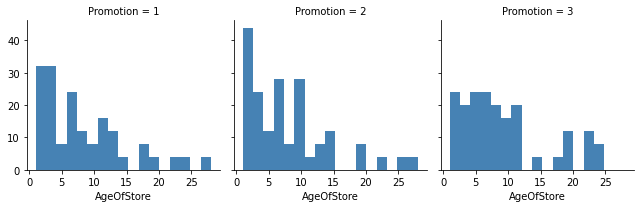

In [15]:
g = sns.FacetGrid(campaign, col="Promotion",margin_titles=True)
bins = np.linspace(1,28,18)
g.map(plt.hist, "AgeOfStore",color="steelblue", bins=bins);
#g.ylabel('Number of stores');??

As we can see in the facetgrid comparing 3 different promotions, the x-axis shows different ages of stores while the y-axis counts the quantity of each age stores. The three promotion campaigns are overall new stores. Campaign promotion 2 has larger difference among store ages with the highest number of 36 of 1-year age store and lowest of 4 while campaign promotion 3 are more evenly-balanced with the highest of 24 and lowest 4. 

Question D. Using an appropriate statistical test for each comparison, compare every possible promotion (Promotion 1 vs. Promotion 2, Promotion 2 vs. Promotion 3, and Promotion 1 vs. Promotion 3) to see which one is most effective at generating sales.

In [16]:
campaign.shape

(548, 7)

In [17]:
from scipy import stats
stats.normaltest(campaign['SalesInThousands'])

NormaltestResult(statistic=48.47978622544174, pvalue=2.9699434440135903e-11)

In [18]:
std=campaign['SalesInThousands'].std()
m=campaign['SalesInThousands'].mean()
stats.kstest(campaign['SalesInThousands'],'norm',(m,std))

KstestResult(statistic=0.12005749431512436, pvalue=2.43219556834565e-07)

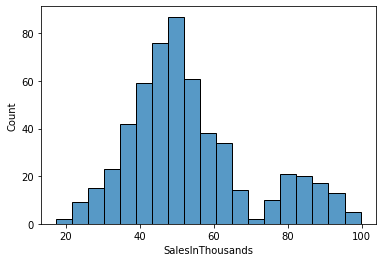

In [19]:
sns.histplot(x='SalesInThousands',data=campaign);

Variable Sales in thousands is not normally distributed. I did normal test and kstest that all show p value less than 0.05. Also I drew a histgram of sales that is a little bit skewed.

In [20]:
#campaign.describe()
#campaign['Promotion'].value_counts()
campaign.groupby('Promotion').describe()[['SalesInThousands']]

SalesInThousands                                                \
                     count       mean        std    min      25%     50%   
Promotion                                                                  
1                    172.0  58.099012  16.553782  30.81  46.3525  55.385   
2                    188.0  47.329415  15.108955  17.34  38.1700  45.385   
3                    188.0  55.364468  16.766231  22.18  44.1975  51.165   

                           
               75%    max  
Promotion                  
1          63.6175  99.65  
2          51.7450  88.64  
3          61.7325  96.48

In [65]:
from scipy import stats
t1,p1=stats.ttest_ind(campaign.loc[campaign['Promotion']==1,'SalesInThousands'].values,
                    campaign.loc[campaign['Promotion']==2,'SalesInThousands'].values,equal_var=False)
print(t1,p1)

6.42752867090748 4.2903687179871785e-10


In [66]:
from scipy import stats
t2,p2=stats.ttest_ind(campaign.loc[campaign['Promotion']==1,'SalesInThousands'].values,
                    campaign.loc[campaign['Promotion']==3,'SalesInThousands'].values,equal_var=False)
print(t2,p2)

1.5560224307758634 0.12059147742229478


In [67]:
from scipy import stats
t3,p3=stats.ttest_ind(campaign.loc[campaign['Promotion']==2,'SalesInThousands'].values,
                    campaign.loc[campaign['Promotion']==3,'SalesInThousands'].values,equal_var=False)
print(t3,p3)

-4.88139271089348 1.5692733176039892e-06


My null hypothesis is that different campaign promotions' sales have no clear differences and they bring the same sales.My first comparison's t-statistic is 6.43 and p-value is very small. So we can reject the null hypothesis. My second comparison's t-statistic is 1.56 and p-value is 0.12. P-value is over alpha 0.05 and we fail to reject the null hypothesis.My third comparison's t-statistic is -4.88 and p-value is very small.So we can reject the null hypothesis.
Thus we can say promotion 1 to 3 and promotion 2 to 3 have more difference. I will recommend promotion 1 to the lobster land. 

 # Part II:A/BTestingTwoAppVersions (5 points)

In [30]:
lobster_run=pd.read_csv('/Users/luoyayuan/Desktop/Class Slides/654/assignment4/lobster_run.csv')
lobster_run.head()

,userid,version,sum_gamerounds,retention_1,retention_7,user_spend
0,1,Gulf of Maine,3,False,False,17.09
1,2,Gulf of Maine,38,True,False,15.30
2,7,Gulf of Maine,0,False,False,13.67
3,12,Gulf of Maine,0,False,False,16.92
4,14,Gulf of Maine,39,True,False,8.42


A. Generate a histogram to view the user_spend variable.

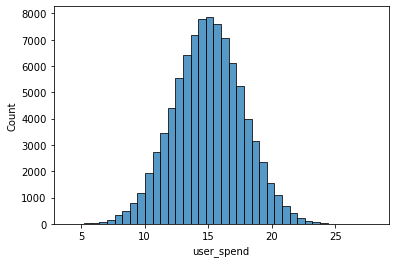

In [31]:
sns.histplot(x='user_spend',bins=40,data=lobster_run);

This histogram seems to be normally distributed. User spending range within 5 to 25 and most people spend about 15.

B. Generate another histogram that depicts user_spend, but this time, use version as a color or hue variable.

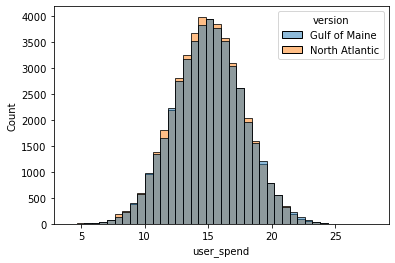

In [32]:
sns.histplot(x='user_spend',bins=40,hue='version',data=lobster_run);

The histogram shows the quantities of two versions' spending. Mostly these two versions overlap and there is no clear distinction. However, North Atlantic has little more numbers of user spending. 

C. Conduct a statistical test to check whether the user_spend variable is normally distributed.
a. What is your test’s null hypothesis?
b. Based on the p-value that you see as a result, what can you say about the
distribution of this variable?

In [33]:
#from scipy import stats
stats.normaltest(lobster_run['user_spend'])

NormaltestResult(statistic=0.23395589442055797, pvalue=0.8896048112149306)

In [34]:
std1=lobster_run['user_spend'].std()
m1=lobster_run['user_spend'].mean()
stats.kstest(lobster_run['user_spend'],'norm',(m1,std1))

KstestResult(statistic=0.0032224506325975177, pvalue=0.3055352702580256)

My null hypothesis is that variable user_spend is normally distributed. Both my normal test and kstest showed that the P-values are 0.89 and 0.31,which are all over 0.05. So we will not reject the null hypothesis. And my distribution of this variable user_spend is normally distributed.

D. Next, conduct an appropriate statistical test to check whether version has a significant impact on user spending. You can use any alpha value that you prefer to use for the significance threshold.

In [35]:
lobster_run.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userid          90189 non-null  int64  
 1   version         90189 non-null  object 
 2   sum_gamerounds  90189 non-null  int64  
 3   retention_1     90189 non-null  bool   
 4   retention_7     90189 non-null  bool   
 5   user_spend      90189 non-null  float64
dtypes: bool(2), float64(1), int64(2), object(1)
memory usage: 2.9+ MB


In [50]:
t4,p4=stats.ttest_ind(lobster_run.loc[lobster_run['version']=='Gulf of Maine','user_spend'].values,
                      lobster_run.loc[lobster_run['version']=='North Atlantic','user_spend'].values,equal_var=False)
print(t4,p4)

1.5874056946017774 0.11242429738514634


My null hypothesis is that Gulf of Maine version = North Atlantic version. I set the alpha value 10%. The P-value is 0.112, which is greater than the alpha value we set. So we can say that we cannot reject the null hypothesis.

E. Next, generate some summary stats here -- group the observations by ‘version’ and then compare the retention_1 and the retention_7 outcomes

In [39]:
lobster_run.groupby(by='version')['retention_1'].value_counts()

version         retention_1
Gulf of Maine   False          24666
                True           20034
North Atlantic  False          25370
                True           20119
Name: retention_1, dtype: int64

In [40]:
lobster_run.groupby(by='version')['retention_7'].value_counts()

version         retention_7
Gulf of Maine   False          35956
                True            8744
North Atlantic  False          37210
                True            8279
Name: retention_7, dtype: int64

the total number is not evenly-balanced and need some adjustment.
From the above two calculations, the first one shows that different versions have little effect on retention_1. This shows that in both versions, the engagement after one day does not reflect a significant gap.
The second one shows that Gulf of Maine version has a positive effect on retention_7. This is because Gulf of Maine version has a larger True number and a smaller False number. This suggests that users who open Gulf of Maine are more likely to be engaged in the game seven days after downloading it.

F. Using an appropriate statistical test, compare the retention_1 outcomes for the two app versions.

In [58]:
pd.value_counts(lobster_run['version'],normalize=True)

North Atlantic    0.504374
Gulf of Maine     0.495626
Name: version, dtype: float64

In [59]:
pd.value_counts(lobster_run['retention_1'])

False    50036
True     40153
Name: retention_1, dtype: int64

In [60]:
north_expected1=40153*0.504374
gulf_expected1=40153*0.495626
print(north_expected1,gulf_expected1)

20252.129222 19900.870778


In [61]:
from scipy.stats import chisquare
observed_values= scipy.array([20119,20034])
expected_values = scipy.array([20252.129222,19900.870778])
chisquare(observed_values, expected_values)

/var/folders/69/sjzrfpp90kb586qq0vrpgyjw0000gn/T/ipykernel_1090/2828127528.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  observed_values= scipy.array([20119,20034])
/var/folders/69/sjzrfpp90kb586qq0vrpgyjw0000gn/T/ipykernel_1090/2828127528.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  expected_values = scipy.array([20252.129222,19900.870778])


Power_divergenceResult(statistic=1.7657207362746923, pvalue=0.18391255949974217)

My null hypothesis is that there is no huge data differences in engagement between the two versions one day after download. The P-value is greater than the usual alpha value of 0.05. Thus we can reject the null hypothesis. Unlike previous conclusions made by just looking at the data, chisquare's p-value tells us that there are data differences in engagement between the two versions one day after download. Since the more these values diverge from each other, the higher the chi square score, the more likely it is to be significant, so different versions are related to the retension of one day after download. 


G. Using an appropriate statistical test, compare the retention_7 outcomes for the two app versions

In [62]:
pd.value_counts(lobster_run['retention_7'])

False    73166
True     17023
Name: retention_7, dtype: int64

In [63]:
north_expected7=17023*0.504374
gulf_expected7=17023*0.495626
print(north_expected7,gulf_expected7)

8585.958602 8437.041398


In [64]:
from scipy.stats import chisquare
observed_values= scipy.array([8279,8744])
expected_values = scipy.array([8585.958602,8437.041398])
chisquare(observed_values, expected_values)

/var/folders/69/sjzrfpp90kb586qq0vrpgyjw0000gn/T/ipykernel_1090/949536146.py:2: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  observed_values= scipy.array([8279,8744])
/var/folders/69/sjzrfpp90kb586qq0vrpgyjw0000gn/T/ipykernel_1090/949536146.py:3: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead
  expected_values = scipy.array([8585.958602,8437.041398])


Power_divergenceResult(statistic=22.141994851507874, pvalue=2.532096033395736e-06)

According to the chisquare above, the P-value is so low that we can reject the null hypothesis. In the same way as the conclusions drawn from previous observations of the data, chisquare's p-value tells us that there is a data difference between the two versions in terms of engagement seven days after download.

H. Write a couple sentences of thoughts and/or recommendations for Lobster Land based on the overall results that you have found from the Super Lobster Run data and the statistical tests.

In this A/B test, the user showed higher retaintion rate one days after the download in North Atlantic version. So I recommend using the North Atlantic version to extent the download rate and may increase the user spending.

# Part III: Wildcard (1 point)

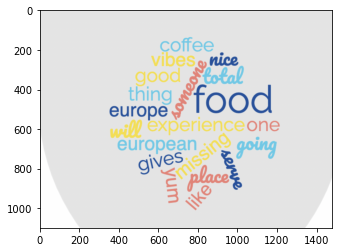

In [68]:
from PIL import Image
myimage=Image.open('/Users/luoyayuan/Desktop/word.png');
plt.imshow(myimage);

I show my favorite brunch restaurant in downtown Boston called Cafe Bonjour. Wordclouds are graphical representations of Word frequency that give greater prominence to Words that appear more frequently in my review text. The larger the Word in the visual the more common the Word was in the the reviews of yelp.And here the most frequent one is food. It makes sense that when we review the comments of others, they all recommend what they like and give their personal experience. We roughly know that this restaurant serves european favored food that has positive judges.We reviewer when seeing these wordsclouds and we want to give a try to this restaurant.